In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
x = data.data
y = data.target

In [3]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size =0.2, random_state=42)

In [6]:
expicted_var = []
for n in range(1, x.shape[1]+1):
    pca =PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train)
    expicted_var.append(np.sum(pca.explained_variance_ratio_))

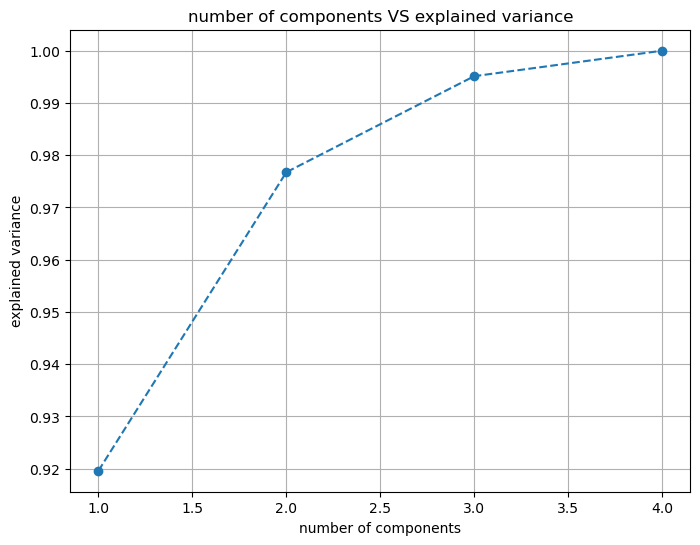

In [10]:
plt.figure(figsize=(8,6))
plt.plot(range(1, x.shape[1]+1), expicted_var, linestyle='--', marker= 'o')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('number of components VS explained variance')
plt.grid()

plt.show()

In [11]:
expicted_var

[0.9195992565966303,
 0.9767430277988385,
 0.9951268103867543,
 1.0000000000000002]

In [12]:
chousec_comp = np.argmax(np.diff(expicted_var))+1
chousec_comp

1

In [13]:
pca1 = PCA(n_components=chousec_comp)
x_train_pca = pca1.fit_transform(x_train)
x_test_pca = pca1.fit_transform(x_test)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [15]:
print(model.score(x_test_pca,y_test))

0.9666666666666667
